## Credit-card-fraud-detection

Business challenge of this capstone project is to detect potential frauds so that customers are not wrongly charged for items that they did not purchase. We know that credit card fraud has become more & more rampant in recent years. So there is a dire need to improve risk management level in an effective way. This can be achieved by building an accurate & easy credit card risk monitoring system. There are many Machine learning algorithms that can be used for this purpose. The main aim of this project is to build a user model that best identifies fraud cases.


The project pipeline can be briefly summarized in the following four steps:


1) Data Understanding

2) Exploratory data analytics (EDA)

3) Train/Test Split

4) Model-Building/Hyperparameter Tuning



IMPORTING THE LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc


In [3]:
# Importing train data
df_train =pd.read_csv("fraudTrain.csv")
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### EXPLORATORY DATA ANALYSIS

In [4]:
# Checking the shape of the dataset
print("Train Data size :  ",df_train.shape)

Train Data size :   (1296675, 23)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# Converting date columns to datetime format
df_train['Trans_date'] = pd.to_datetime(df_train['trans_date_trans_time']).dt.date
df_train['Trans_date']=pd.to_datetime(df_train['Trans_date'])
df_train['Trans_time'] = pd.to_datetime(df_train['trans_date_trans_time']).dt.hour
df_train['dob']=pd.to_datetime(df_train['dob'])
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Trans_date,Trans_time
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,0


In [7]:
# Creating new Columns for Present Age,Days of the week and Month
df_train['Present_Age'] = round((df_train['Trans_date'] - df_train['dob'])/np.timedelta64(1, 'Y'))
df_train['Day_of_week'] = df_train.Trans_date.dt.dayofweek
df_train['Month'] = df_train['Trans_date'].dt.month
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Trans_date,Trans_time,Present_Age,Day_of_week,Month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,0,31.0,1,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,0,41.0,1,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,0,57.0,1,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,0,52.0,1,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,0,33.0,1,1


In [8]:
print("Maximum Age :",df_train['Present_Age'].max())
print("Minimum Age :",df_train['Present_Age'].min())

Maximum Age : 96.0
Minimum Age : 14.0


In [9]:
import math

def dist(lat1, long1, lat2, long2):
    # Earth radius in kilometers
    R = 6373.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    long1_rad = math.radians(long1)
    lat2_rad = math.radians(lat2)
    long2_rad = math.radians(long2)

    # Calculate differences in latitude and longitude
    dlat = lat2_rad - lat1_rad
    dlong = long2_rad - long1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlong / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c  # Distance in kilometers

    return round(d, 4)


In [10]:
Dist = []

for p, q, r, s in zip(df_train['lat'], df_train['long'], df_train['merch_lat'], df_train['merch_long']):
    distance = dist(p, q, r, s)
    Dist.append(distance)


df_train['Distance']= Dist
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Trans_date,Trans_time,Present_Age,Day_of_week,Month,Distance
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,0,31.0,1,1,78.6222
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,0,41.0,1,1,30.2217
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,0,57.0,1,1,108.2401
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,0,52.0,1,1,95.7033
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,0,33.0,1,1,77.5811


In [11]:
df_train['Age_category'] = pd.cut(x=df_train['Present_Age'], bins=[0,10,20,30,40,50,60,70,80,90,100],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Trans_date,Trans_time,Present_Age,Day_of_week,Month,Distance,Age_category
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,0,31.0,1,1,78.6222,30-40
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,0,41.0,1,1,30.2217,40-50
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,0,57.0,1,1,108.2401,50-60
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,0,52.0,1,1,95.7033,50-60
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,0,33.0,1,1,77.5811,30-40


In [12]:
print("Value count for age category ")
print(df_train['Age_category'].value_counts())


Value count for age category 
40-50     303491
30-40     288784
20-30     213729
50-60     184973
60-70     131849
70-80      70911
10-20      43042
80-90      42200
90-100     17696
0-10           0
Name: Age_category, dtype: int64


In [13]:
#dropping several columns
df_train1 = df_train.drop(['trans_date_trans_time','first','last','lat','long', 'Unnamed: 0','cc_num', 'zip', 'amt', 'trans_num', 'unix_time','merch_lat','merch_long'],axis=1)
df_train1.head()

,merchant,category,gender,street,city,state,city_pop,job,dob,is_fraud,Trans_date,Trans_time,Present_Age,Day_of_week,Month,Distance,Age_category
0,"fraud_Rippin, Kub and Mann",misc_net,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",1988-03-09,0,2019-01-01,0,31.0,1,1,78.6222,30-40
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,1978-06-21,0,2019-01-01,0,41.0,1,1,30.2217,40-50
2,fraud_Lind-Buckridge,entertainment,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,1962-01-19,0,2019-01-01,0,57.0,1,1,108.2401,50-60
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,1967-01-12,0,2019-01-01,0,52.0,1,1,95.7033,50-60
4,fraud_Keeling-Crist,misc_pos,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,1986-03-28,0,2019-01-01,0,33.0,1,1,77.5811,30-40


In [14]:
Transaction = df_train1['is_fraud'].value_counts()
print("normal_trans =", round(Transaction[0]/df_train1['is_fraud'].count()*100, 3))
print("fraud_trans =", round(Transaction[1]/df_train1['is_fraud'].count()*100,3))

normal_trans = 99.421
fraud_trans = 0.579


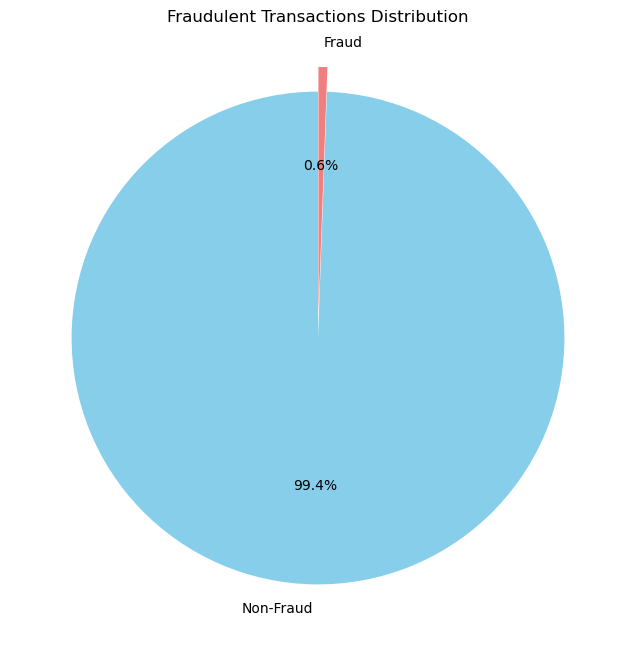

In [15]:
fraud_counts = df_train1['is_fraud'].value_counts()
labels = ['Non-Fraud', 'Fraud']
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0, 0.1))
plt.title('Fraudulent Transactions Distribution')
plt.show()

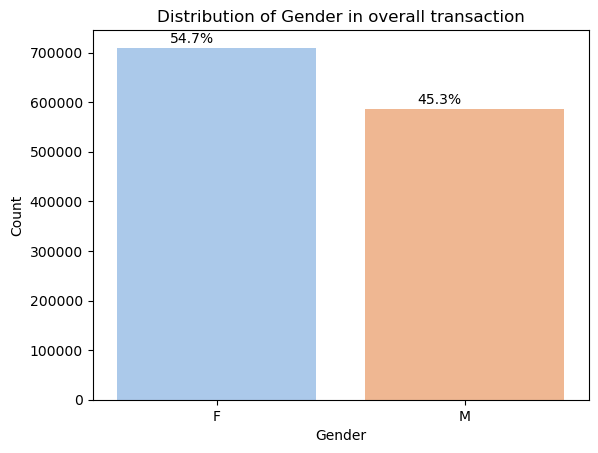

In [16]:
ax = sns.countplot(x='gender', data=df_train1, palette='pastel')

# Add percentage annotations
total = len(df_train1['gender'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 10000
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribution of Gender in overall transaction')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

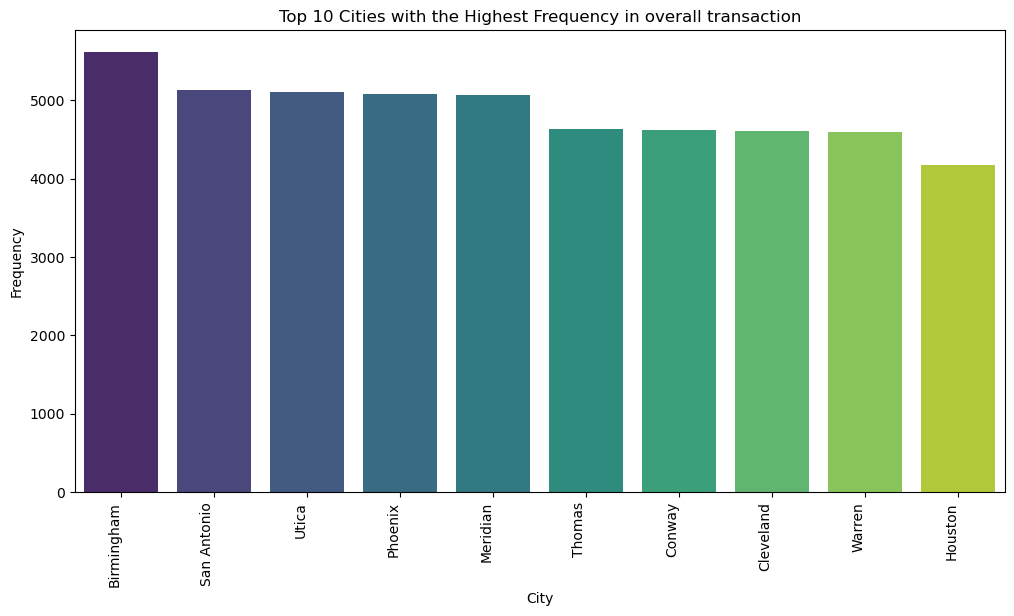

In [17]:
top_cities = df_train1['city'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))

# Create a bar graph
ax = sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')

# Rotate city names 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Add labels
plt.title('Top 10 Cities with the Highest Frequency in overall transaction')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

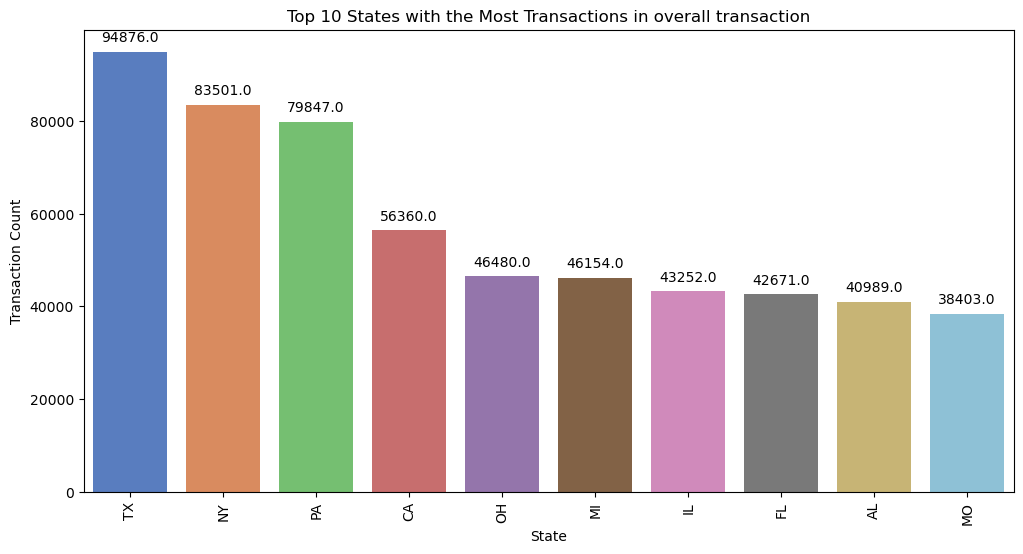

In [18]:
top_states = df_train1['state'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))

# Create a bar graph
ax = sns.barplot(x=top_states.index, y=top_states.values, palette='muted')

# Rotate state names
plt.xticks(rotation=90)

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top 10 States with the Most Transactions in overall transaction')
plt.xlabel('State')
plt.ylabel('Transaction Count')
plt.show()

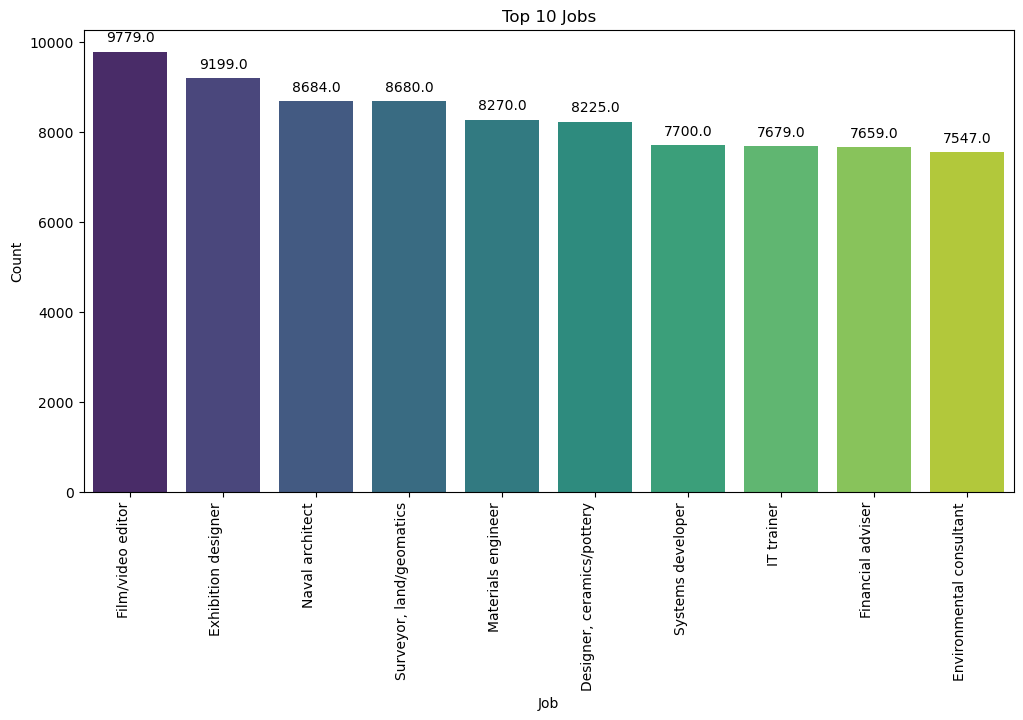

In [19]:
top_10_jobs = df_train1['job'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_jobs.index, y=top_10_jobs, palette='viridis')

# Rotate job names
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top 10 Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

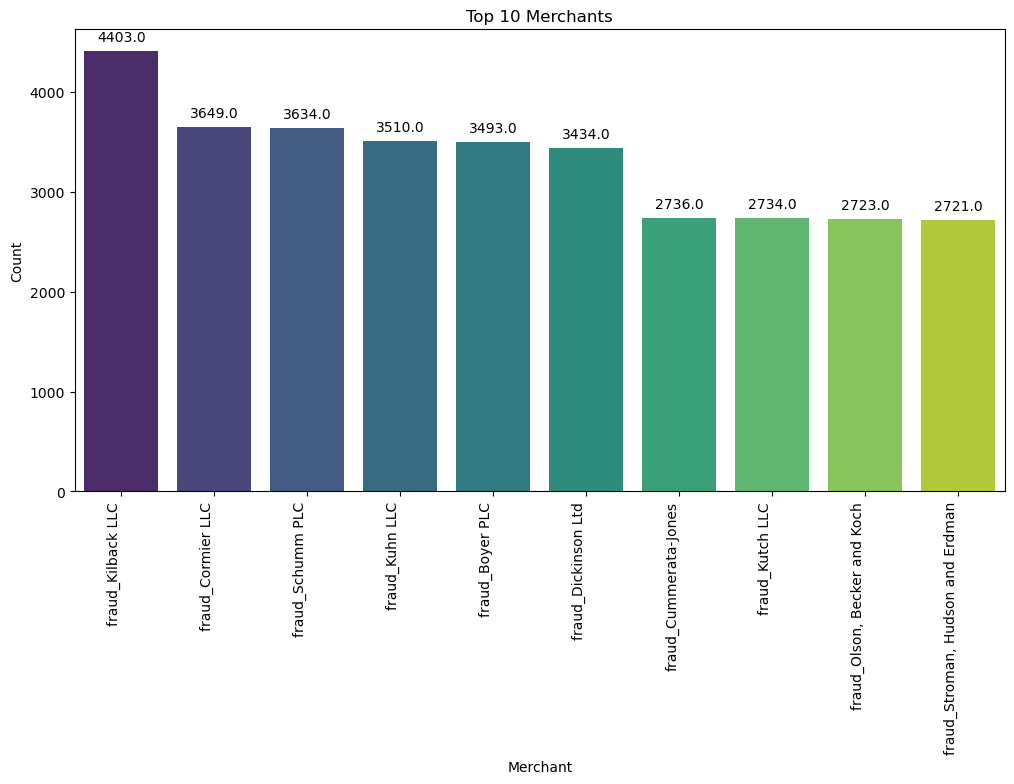

In [20]:
top_merchants = df_train1['merchant'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_merchants.index, y=top_merchants.values, palette='viridis')

# Rotate merchant names
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top 10 Merchants')
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.show()

Filtering out the fraud transaction from the overall transaction

In [21]:
df_train_fraud = df_train1[df_train1.is_fraud==1]
df_train_fraud.head()

,merchant,category,gender,street,city,state,city_pop,job,dob,is_fraud,Trans_date,Trans_time,Present_Age,Day_of_week,Month,Distance,Age_category
2449,fraud_Rutherford-Mertz,grocery_pos,M,542 Steve Curve Suite 011,Collettsville,NC,885,Soil scientist,1988-09-15,1,2019-01-02,1,30.0,2,1,68.9751,20-30
2472,"fraud_Jenkins, Hauck and Friesen",gas_transport,F,27954 Hall Mill Suite 575,San Antonio,TX,1595797,Horticultural consultant,1960-10-28,1,2019-01-02,1,58.0,2,1,78.4307,50-60
2523,fraud_Goodwin-Nitzsche,grocery_pos,F,27954 Hall Mill Suite 575,San Antonio,TX,1595797,Horticultural consultant,1960-10-28,1,2019-01-02,3,58.0,2,1,41.0251,50-60
2546,fraud_Erdman-Kertzmann,gas_transport,M,542 Steve Curve Suite 011,Collettsville,NC,885,Soil scientist,1988-09-15,1,2019-01-02,3,30.0,2,1,34.1565,20-30
2553,fraud_Koepp-Parker,grocery_pos,F,27954 Hall Mill Suite 575,San Antonio,TX,1595797,Horticultural consultant,1960-10-28,1,2019-01-02,3,58.0,2,1,44.2233,50-60


In [22]:
df_train_fraud.shape

(7506, 17)

In [23]:
# Calculate the count of each gender class
classes = df_train_fraud['gender'].value_counts()

# Calculate the percentage distribution
print("Female =", round(classes[0]/df_train_fraud['gender'].count()*100,2))
print("Male =", round(classes [1]/df_train_fraud['gender'].count()*100,2))

Female = 50.24
Male = 49.76


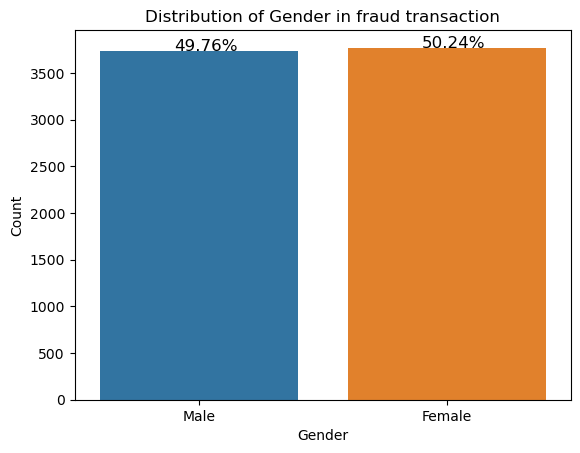

In [24]:
x=['Male','Female']
y= [df_train_fraud.gender.value_counts()[1],df_train_fraud.gender.value_counts()[0]]
ax = sns.barplot(x=x,y=y)
# Add percentage annotations
total = len(df_train_fraud['gender'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

plt.title('Distribution of Gender in fraud transaction')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

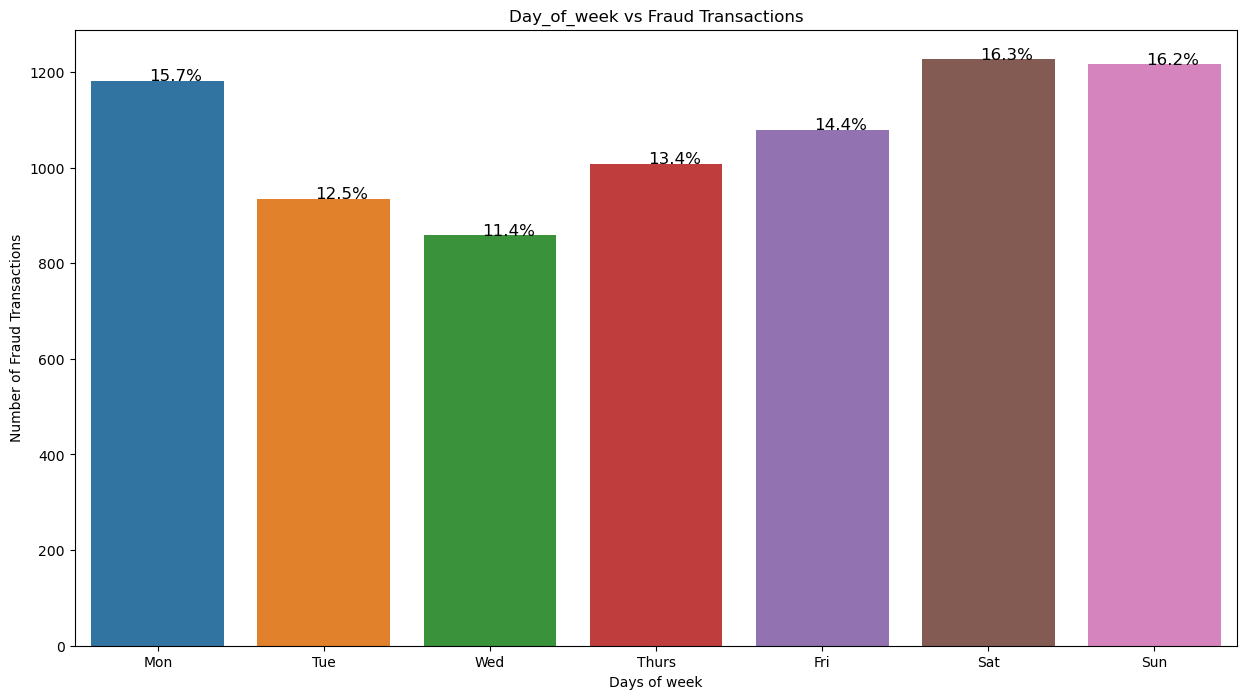

In [25]:
plt.figure(figsize=[15, 8])

# Create a count plot
ax = sns.countplot(x='Day_of_week', data=df_train_fraud)

# Annotate the plot with percentage values
for p in ax.patches:
    total = len(df_train_fraud['is_fraud'])
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

# Customize the plot
week = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
x_ticks = [0, 1, 2, 3, 4, 5, 6]
ax.set_title('Day_of_week vs Fraud Transactions')
ax.set_ylabel('Number of Fraud Transactions')
ax.set_xlabel('Days of week')
ax.set_xticks(x_ticks)
ax.set_xticklabels(week)

# Show the plot
plt.show()

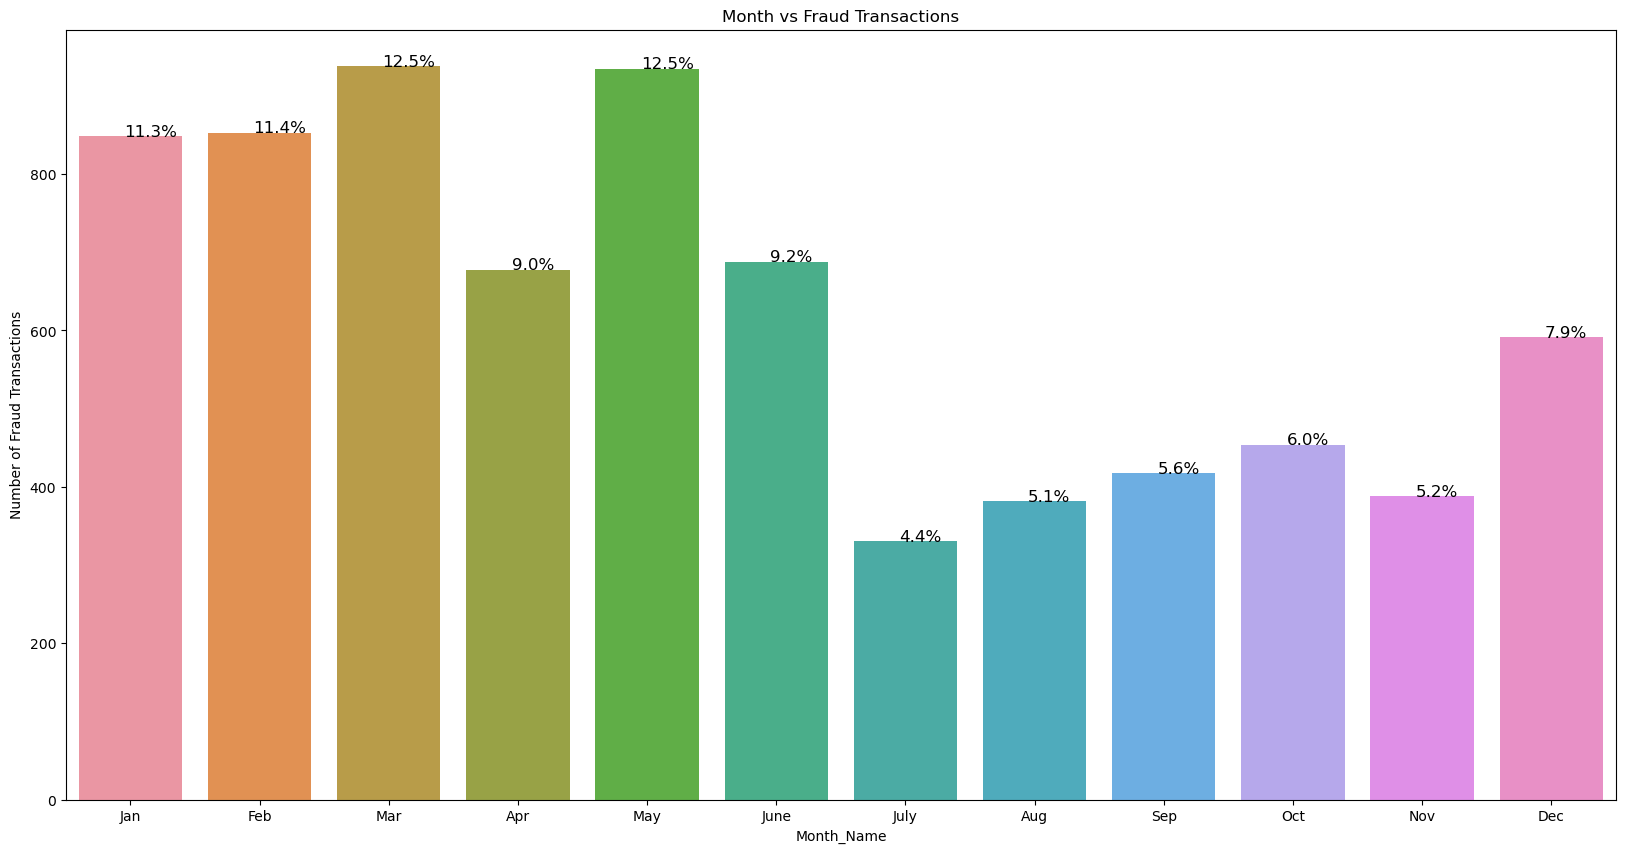

In [26]:
plt.figure(figsize=[20, 10])

# Create a count plot
ax = sns.countplot(x='Month', data=df_train_fraud)

# Annotate the plot with percentage values
for p in ax.patches:
    total = len(df_train_fraud['is_fraud'])
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

# Customize the plot
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax.set_title('Month vs Fraud Transactions')
ax.set_ylabel('Number of Fraud Transactions')
ax.set_xlabel('Month_Name')

ax.set_xticks(x_ticks)
ax.set_xticklabels(month_name)

# Show the plot
plt.show()


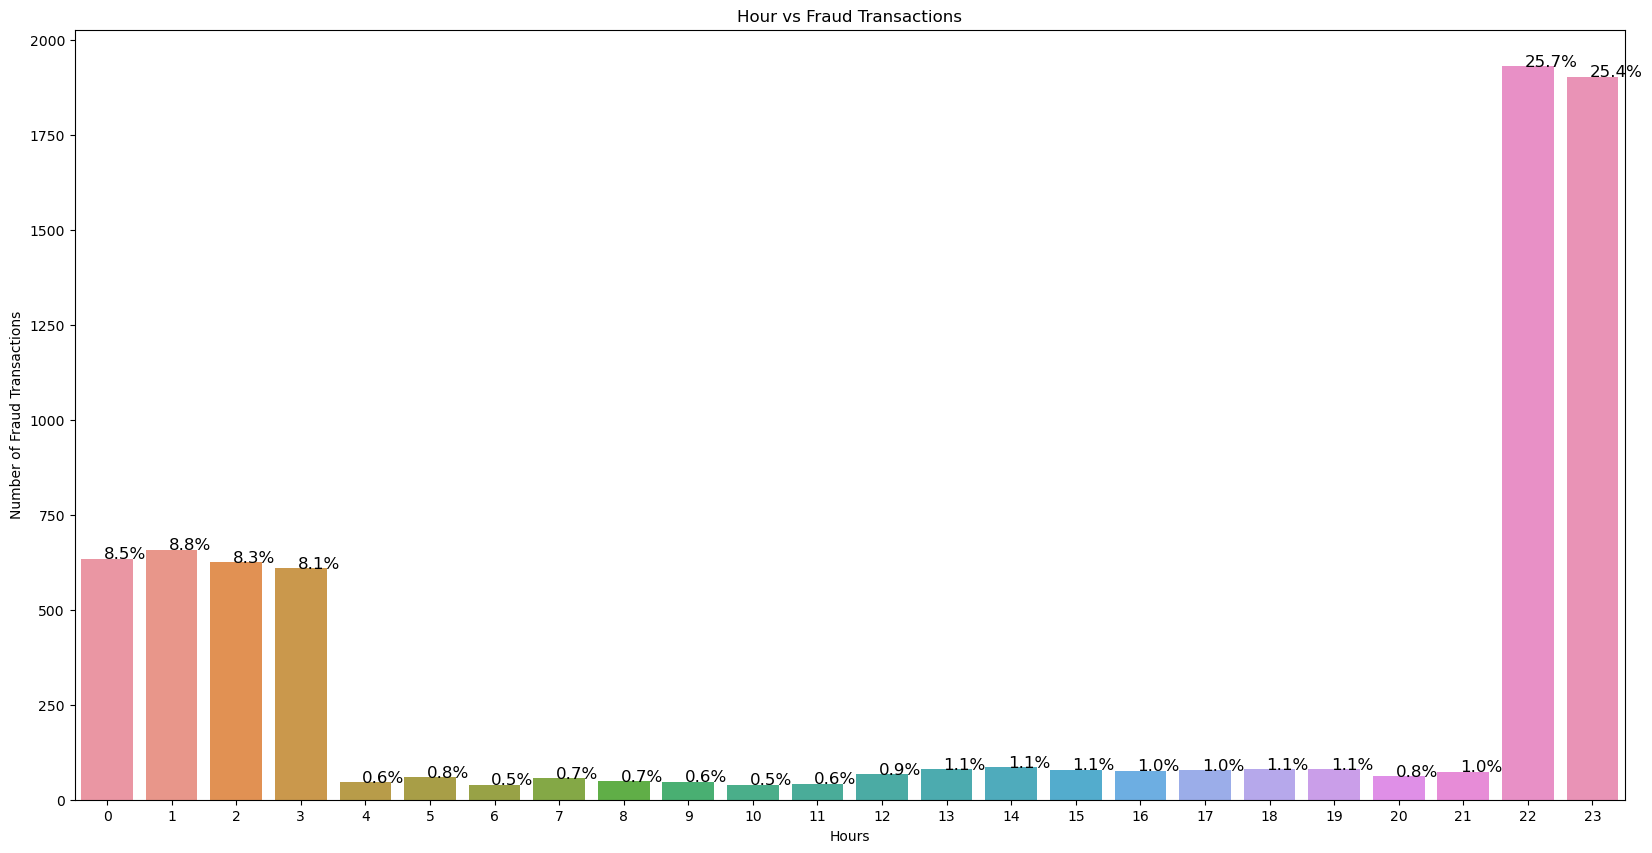

In [27]:
plt.figure(figsize=[20, 10])

# Create a count plot
ax = sns.countplot(x='Trans_time', data=df_train_fraud)

# Annotate the plot with percentage values
for p in ax.patches:
    total = len(df_train_fraud['is_fraud'])
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

# Customize the plot
ax.set_title('Hour vs Fraud Transactions')
ax.set_ylabel('Number of Fraud Transactions')
ax.set_xlabel('Hours')

# Show the plot
plt.show()


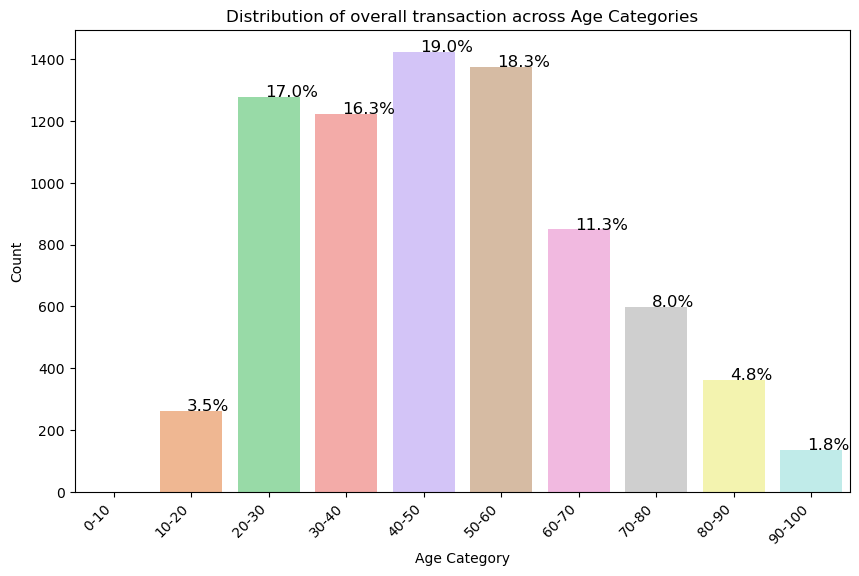

In [28]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Age_category', data=df_train_fraud, palette='pastel', order=df_train1['Age_category'].cat.categories)

total = len(df_train1['Age_category'])
for p in ax.patches:
        total = len(df_train_fraud['is_fraud'])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

plt.title('Distribution of overall transaction across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

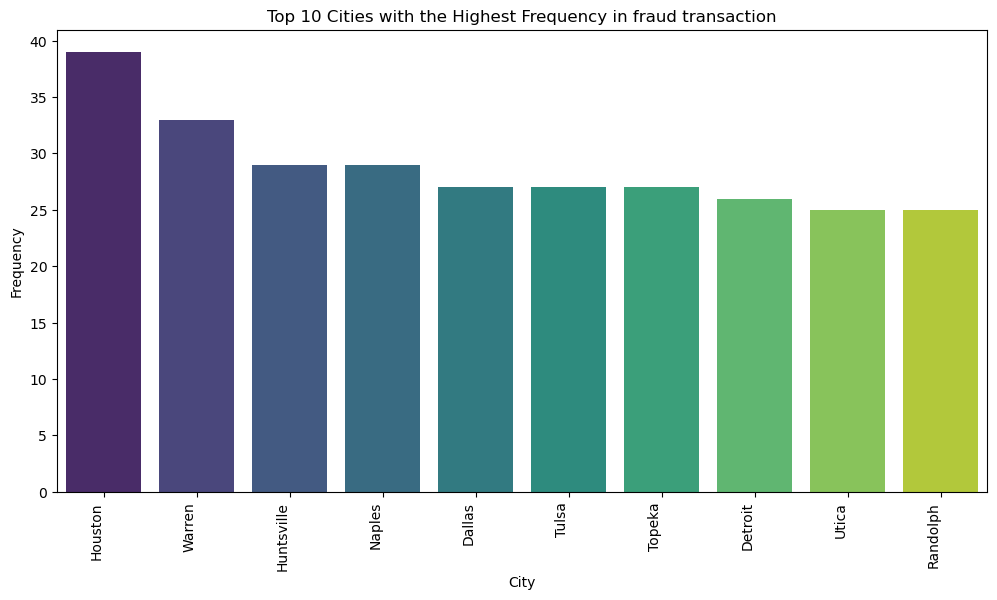

In [29]:
top_cities = df_train_fraud['city'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))

# Create a bar graph
ax = sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')

# Rotate city names 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Add labels
plt.title('Top 10 Cities with the Highest Frequency in fraud transaction')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

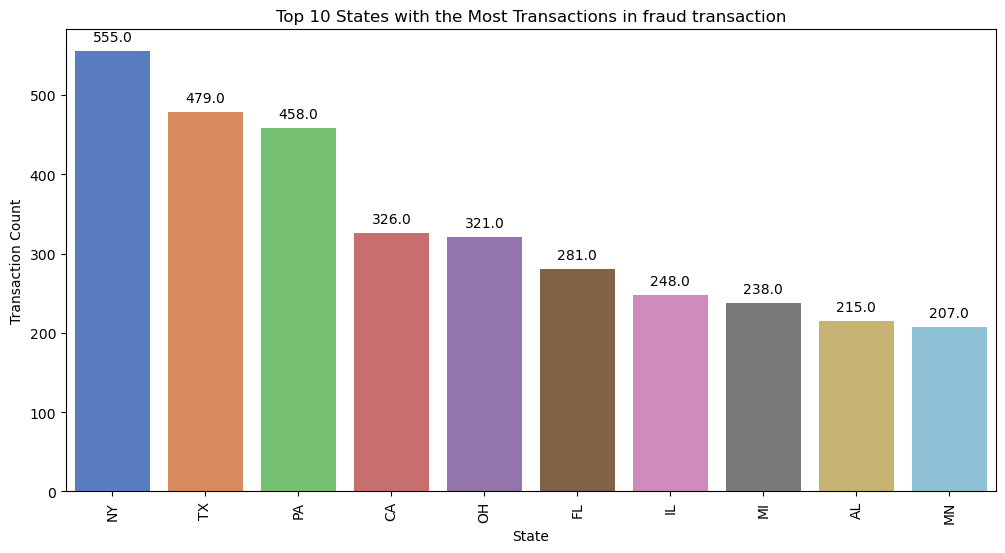

In [30]:
top_states = df_train_fraud['state'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))

# Create a bar graph
ax = sns.barplot(x=top_states.index, y=top_states.values, palette='muted')

# Rotate state names
plt.xticks(rotation=90)

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top 10 States with the Most Transactions in fraud transaction')
plt.xlabel('State')
plt.ylabel('Transaction Count')
plt.show()

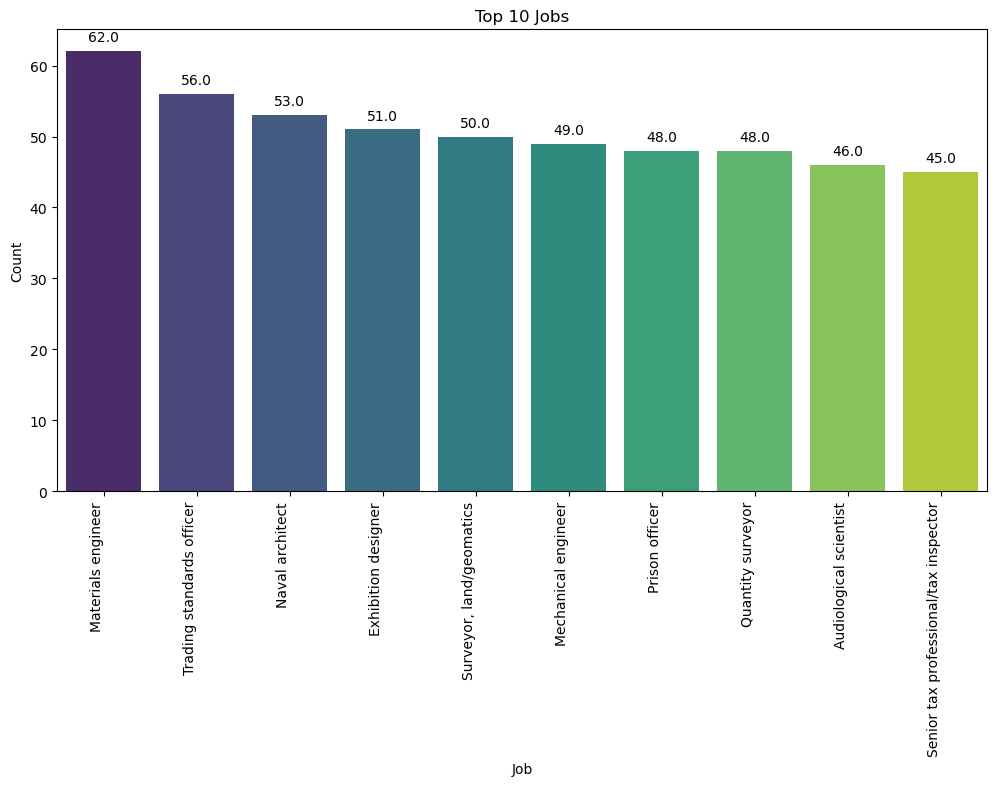

In [31]:
top_10_jobs = df_train_fraud['job'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_jobs.index, y=top_10_jobs, palette='viridis')

# Rotate job names
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top 10 Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

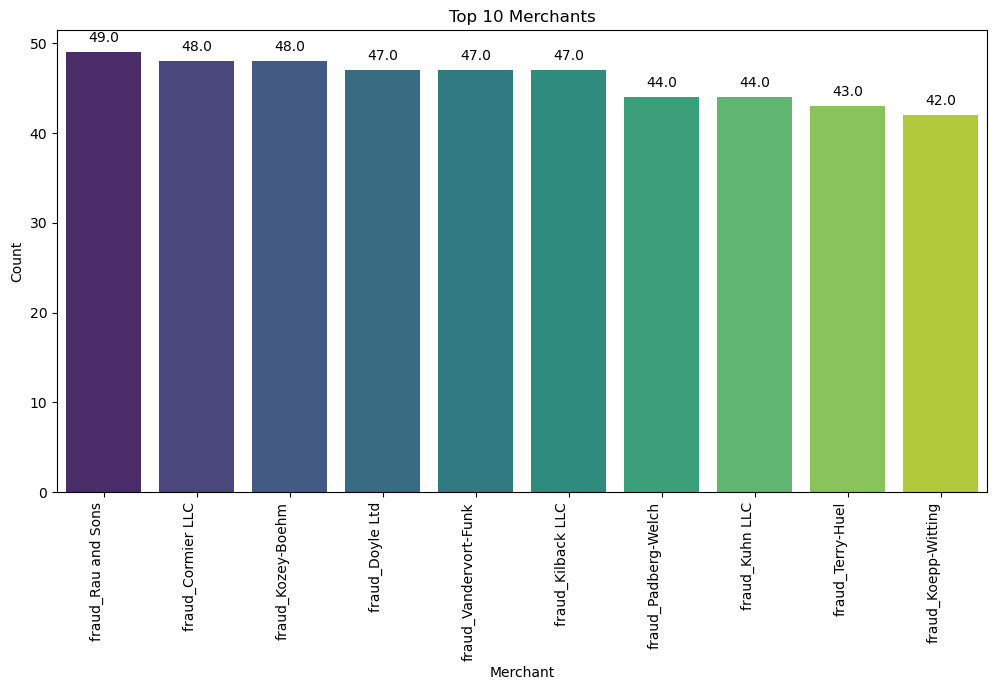

In [32]:
top_merchants = df_train_fraud['merchant'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_merchants.index, y=top_merchants.values, palette='viridis')

# Rotate merchant names
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top 10 Merchants')
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'merchant' column
df_train1['merchant'] = label_encoder.fit_transform(df_train1['merchant'])

# Encode the 'category' column
df_train1['category'] = label_encoder.fit_transform(df_train1['category'])

# Encode the 'gender' column
df_train1['gender'] = label_encoder.fit_transform(df_train1['gender'])

# Encode the 'street' column
df_train1['street'] = label_encoder.fit_transform(df_train1['street'])

# Encode the 'city' column
df_train1['city'] = label_encoder.fit_transform(df_train1['city'])

# Encode the 'state' column
df_train1['state'] = label_encoder.fit_transform(df_train1['state'])

# Encode the 'job' column
df_train1['job'] = label_encoder.fit_transform(df_train1['job'])

#Encode the 'Age_category' column
df_train1['Age_category'] = label_encoder.fit_transform(df_train1['Age_category'])

df_train1.head()

,merchant,category,gender,street,city,state,city_pop,job,dob,is_fraud,Trans_date,Trans_time,Present_Age,Day_of_week,Month,Distance,Age_category
0,514,8,0,568,526,27,3495,370,1988-03-09,0,2019-01-01,0,31.0,1,1,78.6222,2
1,241,4,0,435,612,47,149,428,1978-06-21,0,2019-01-01,0,41.0,1,1,30.2217,3
2,390,0,1,602,468,13,4154,307,1962-01-19,0,2019-01-01,0,57.0,1,1,108.2401,4
3,360,2,1,930,84,26,1939,328,1967-01-12,0,2019-01-01,0,52.0,1,1,95.7033,4
4,297,9,1,418,216,45,99,116,1986-03-28,0,2019-01-01,0,33.0,1,1,77.5811,2


Train/test Split

In [34]:
df_train1.columns

Index(['merchant', 'category', 'gender', 'street', 'city', 'state', 'city_pop',
       'job', 'dob', 'is_fraud', 'Trans_date', 'Trans_time', 'Present_Age',
       'Day_of_week', 'Month', 'Distance', 'Age_category'],
      dtype='object')

In [35]:
df_train2 = df_train1.drop(['dob','Trans_date','Present_Age'],axis=1)
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   merchant      1296675 non-null  int32  
 1   category      1296675 non-null  int32  
 2   gender        1296675 non-null  int32  
 3   street        1296675 non-null  int32  
 4   city          1296675 non-null  int32  
 5   state         1296675 non-null  int32  
 6   city_pop      1296675 non-null  int64  
 7   job           1296675 non-null  int32  
 8   is_fraud      1296675 non-null  int64  
 9   Trans_time    1296675 non-null  int64  
 10  Day_of_week   1296675 non-null  int64  
 11  Month         1296675 non-null  int64  
 12  Distance      1296675 non-null  float64
 13  Age_category  1296675 non-null  int32  
dtypes: float64(1), int32(8), int64(5)
memory usage: 98.9 MB


In [36]:
X = df_train2.drop('is_fraud',axis=1)

y = df_train2['is_fraud']

In [37]:
X_train,X_test,y_train,y_test= train_test_split(X,y,stratify=y,random_state=42)

In [38]:
print(X_train.columns)
print("__"*100)
print("Shape of X_train and X_test",X_train.shape,X_test.shape)

Index(['merchant', 'category', 'gender', 'street', 'city', 'state', 'city_pop',
       'job', 'Trans_time', 'Day_of_week', 'Month', 'Distance',
       'Age_category'],
      dtype='object')
________________________________________________________________________________________________________________________________________________________________________________________________________
Shape of X_train and X_test (972506, 13) (324169, 13)


Scaling variable

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_lg =X_train.copy()
X_train_lg[['Distance','city_pop']]=scaler.fit_transform(X_train_lg[['Distance','city_pop']])
X_train_lg.head()

,merchant,category,gender,street,city,state,city_pop,job,Trans_time,Day_of_week,Month,Distance,Age_category
267436,391,7,1,139,426,22,0.001531,150,18,6,5,0.368918,3
233159,482,7,0,891,773,17,0.000110,71,21,5,4,0.627032,4
430072,107,2,1,818,582,15,0.001984,134,2,4,7,0.709002,4
236662,169,7,0,459,501,13,0.028928,251,23,6,4,0.475991,3
450357,675,6,1,903,630,35,0.002154,416,12,4,7,0.509887,7


In [40]:
X_train_lg.corr()

,merchant,category,gender,street,city,state,city_pop,job,Trans_time,Day_of_week,Month,Distance,Age_category
merchant,1.000000,0.032046,-0.000482,0.001038,-0.000246,-0.000225,0.000993,0.000819,-0.002697,0.000046,-0.000401,0.000623,-0.006183
category,0.032046,1.000000,-0.028808,0.002102,0.000426,0.001376,0.009675,0.003553,0.158577,-0.000903,-0.000366,0.002361,-0.004010
gender,-0.000482,-0.028808,1.000000,0.043609,0.016784,-0.032531,-0.028817,-0.080300,-0.036858,-0.000874,-0.000266,-0.002210,0.012885
street,0.001038,0.002102,0.043609,1.000000,-0.025209,0.014341,-0.012094,-0.020051,-0.009947,-0.002613,0.000374,0.001598,0.046842
city,-0.000246,0.000426,0.016784,-0.025209,1.000000,-0.043414,0.035555,0.019739,0.006567,-0.000792,0.000209,0.004185,-0.016397
state,-0.000225,0.001376,-0.032531,0.014341,-0.043414,1.000000,-0.012082,0.042885,0.007566,0.000855,0.000398,-0.016444,-0.055813
city_pop,0.000993,0.009675,-0.028817,-0.012094,0.035555,-0.012082,1.000000,-0.055553,0.020467,0.002279,0.000203,0.010197,-0.097282
job,0.000819,0.003553,-0.080300,-0.020051,0.019739,0.042885,-0.055553,1.000000,0.011545,0.000104,0.000134,0.001495,-0.021010
Trans_time,-0.002697,0.158577,-0.036858,-0.009947,0.006567,0.007566,0.020467,0.011545,1.000000,0.000362,0.000072,0.000634,-0.170834
Day_of_week,0.000046,-0.000903,-0.000874,-0.002613,-0.000792,0.000855,0.002279,0.000104,0.000362,1.000000,0.038940,0.000371,-0.011451


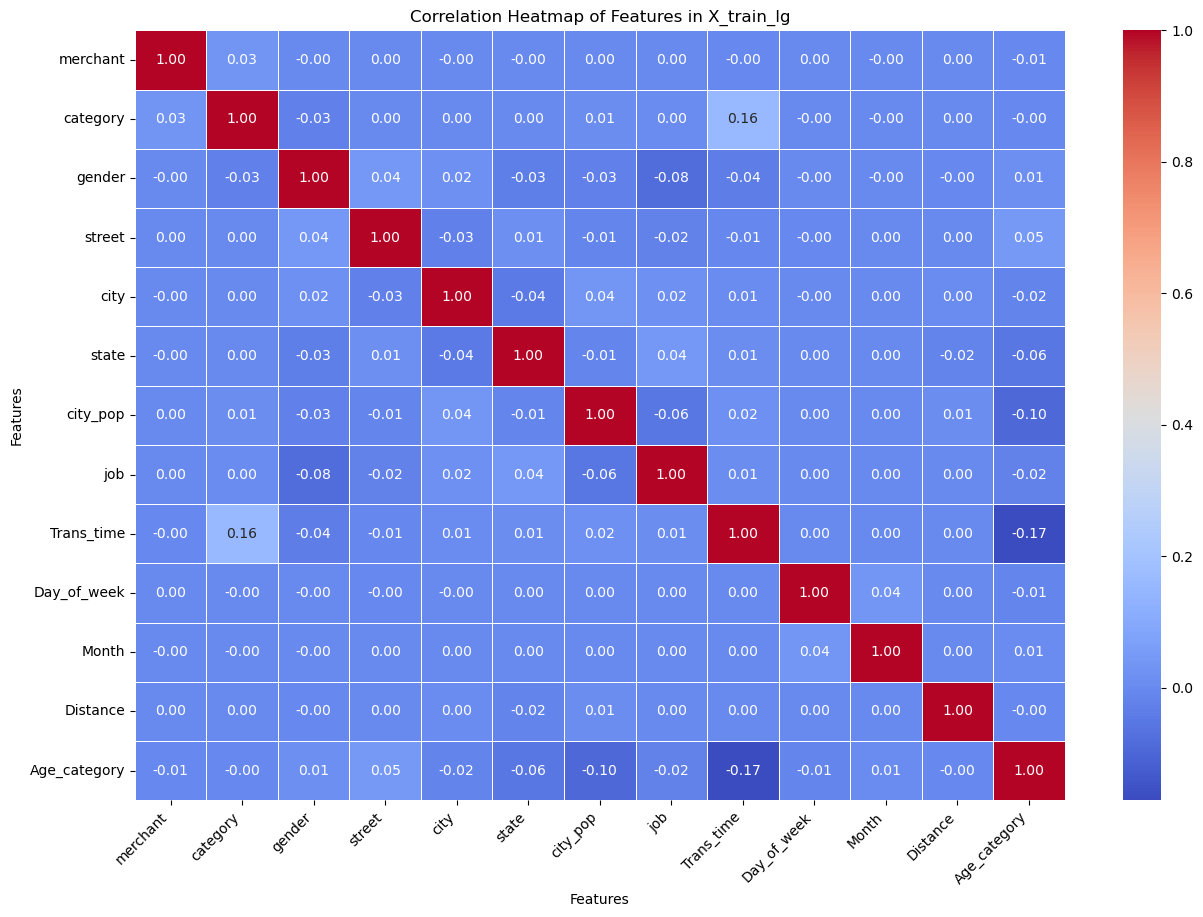

In [41]:
fig, ax = plt.subplots(figsize=(15, 10))

# Customize the heatmap
heatmap = sns.heatmap(X_train_lg.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, ax=ax)

# Set axis labels and title
ax.set_xlabel("Features")
ax.set_ylabel("Features")
ax.set_title("Correlation Heatmap of Features in X_train_lg")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

In [42]:
# Creating a Logistic Regression model
lgrg=LogisticRegression()
# Use RFE for feature selection:
from sklearn.feature_selection import RFE
rfe=RFE(lgrg,n_features_to_select=10)
rfe=rfe.fit(X_train_lg,y_train)
# List the selected features along with their support and ranking
list(zip(X_train_lg.columns, rfe.support_, rfe.ranking_))

[('merchant', True, 1),
 ('category', False, 2),
 ('gender', True, 1),
 ('street', False, 4),
 ('city', False, 3),
 ('state', True, 1),
 ('city_pop', True, 1),
 ('job', True, 1),
 ('Trans_time', True, 1),
 ('Day_of_week', True, 1),
 ('Month', True, 1),
 ('Distance', True, 1),
 ('Age_category', True, 1)]

In [43]:
#store columns selected from rfe
rfe_col=X_train_lg.columns[rfe.support_]

In [44]:
X_train_lg=X_train_lg[rfe_col]
X_train_lg.head()

,merchant,gender,state,city_pop,job,Trans_time,Day_of_week,Month,Distance,Age_category
267436,391,1,22,0.001531,150,18,6,5,0.368918,3
233159,482,0,17,0.000110,71,21,5,4,0.627032,4
430072,107,1,15,0.001984,134,2,4,7,0.709002,4
236662,169,0,13,0.028928,251,23,6,4,0.475991,3
450357,675,1,35,0.002154,416,12,4,7,0.509887,7


Fitting the Logistic regression model

In [45]:
# Add a constant term to the features
X_train_sm = sm.add_constant(X_train_lg)

# Create a Generalized Linear Model (GLM) with a binomial family
model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model
op = model.fit()

# Display the summary of the model
print(op.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_fraud   No. Observations:               972506
Model:                            GLM   Df Residuals:                   972495
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34267.
Date:                Thu, 04 Jan 2024   Deviance:                       68535.
Time:                        21:31:55   Pearson chi2:                 1.03e+06
No. Iterations:                     9   Pseudo R-squ. (CS):          0.0007107
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.9970      0.078    -76.498   

In [46]:
# Droping the merchant,distance and job variable
X_train_lg=X_train_lg.drop(['merchant','job','Distance'],1)
X_train_lg.columns

Index(['gender', 'state', 'city_pop', 'Trans_time', 'Day_of_week', 'Month',
       'Age_category'],
      dtype='object')

In [47]:
# Add a constant term to the features
X_train_sm = sm.add_constant(X_train_lg)

# Create a Generalized Linear Model (GLM) with a binomial family
model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model
op = model.fit()

# Display the summary of the model
print(op.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_fraud   No. Observations:               972506
Model:                            GLM   Df Residuals:                   972498
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34268.
Date:                Thu, 04 Jan 2024   Deviance:                       68536.
Time:                        21:32:04   Pearson chi2:                 1.03e+06
No. Iterations:                     9   Pseudo R-squ. (CS):          0.0007096
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.9763      0.061    -97.674   

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df=pd.DataFrame()
vif_df['features/columns']=X_train_lg.columns
vif_df['VIF']= [variance_inflation_factor(X_train_lg.values,a) for a in range(X_train_lg.shape[1])]
vif_df

,features/columns,VIF
0,gender,1.730166
1,state,3.543070
2,city_pop,1.082501
3,Trans_time,3.439245
4,Day_of_week,2.673918
5,Month,3.575514
6,Age_category,3.103509


In [49]:
y_train_pred=op.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'fraud':y_train.values, 'probability':y_train_pred})
y_train_pred_final['fraud_prediction']=y_train_pred_final.probability.map(lambda a:1 if a >0.6 else 0)
y_train_pred_final1=y_train_pred_final
y_train_pred_final.head()

,fraud,probability,fraud_prediction
267436,0,0.007929,0
233159,0,0.007930,0
430072,0,0.004295,0
236662,0,0.007726,0
450357,0,0.009217,0


## Evaluating the performance of model

In [50]:
confusion = metrics.confusion_matrix(y_train_pred_final['fraud'], y_train_pred_final['fraud_prediction'])
confusion

array([[966877,      0],
       [  5629,      0]], dtype=int64)

In [51]:
#calculating overall accuracy of the model
metrics.accuracy_score(y_train_pred_final['fraud'], y_train_pred_final['fraud_prediction'])

0.994211860903686

In [52]:
# Calculate True Positives (TP)
TP = confusion[1, 1]

# Calculate True Negatives (TN)
TN = confusion[0, 0]

# Calculate False Positives (FP)
FP = confusion[0, 1]

# Calculate False Negatives (FN)
FN = confusion[1, 0]

# Display the results
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 0
True Negatives (TN): 966877
False Positives (FP): 0
False Negatives (FN): 5629


*   Model does not wrongly identify fraud customer as genuine customer as FP =0

Checking false positive rate :-

                    FPR = FP / (TN + FP)

*   Model is failing to identify the positive classes,  as TP =0

Checking Recall :-

                    Recall = TP / (TP + FN)


**Hyper parameter tuning**

In [53]:
lg_imbalanced = LogisticRegression(random_state=42).fit(X_train_lg,y_train)

In [54]:
params_lg = {'C': [0.1, 1, 3],
             'penalty': ['l1', 'l2']}

grid_search_lg = GridSearchCV(estimator=lg_imbalanced,
                              param_grid=params_lg,
                              cv=5,
                              n_jobs=2,
                              verbose=1,
                              scoring='recall')


In [55]:
grid_search_lg.fit(X_train_lg,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=2,
             param_grid={'C': [0.1, 1, 3], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [56]:
best_score = grid_search_lg.best_score_
print("Best Hyperparameters score : ")
print(best_score)

Best Hyperparameters score : 
0.0


In [57]:
# Creating a Function for evaluating the model

def evaluate_model_lg (model):
  y_train_pred = model.predict(X_train_lg)
  y_test_pred = model.predict(X_test)

  print("Train set performance")
  print("Recall : ", recall_score(y_train,y_train_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_train,y_train_pred))
  print("-"*30)

  print("Test set performance")
  print("Recall : ", recall_score(y_test,y_test_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_test,y_test_pred))

In [58]:
# evaluating model using best parameter values
model_lg_imbalanced = grid_search_lg.best_estimator_
model_lg_imbalanced

LogisticRegression(C=0.1, random_state=42)

In [59]:
X_test= X_test[['gender', 'state', 'city_pop', 'Trans_time', 'Day_of_week', 'Month','Age_category']]

In [60]:
evaluate_model_lg(model_lg_imbalanced)

Train set performance
Recall :  0.0
Confusion Matrix : 
[[966877      0]
 [  5629      0]]
------------------------------
Test set performance
Recall :  1.0
Confusion Matrix : 
[[     0 322292]
 [     0   1877]]


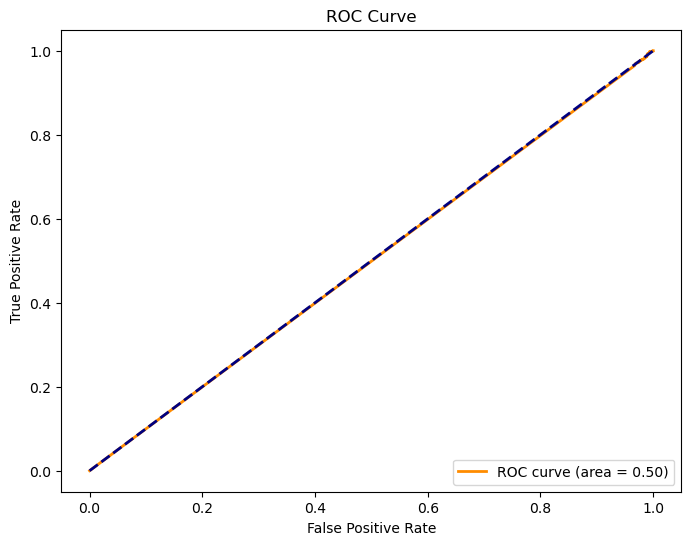

AUC Score: 0.49880897358762705


In [61]:
y_probs = model_lg_imbalanced.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display the AUC score
print("AUC Score:", roc_auc)

The Logistic Regression model predicts almost all the transactions as 'not fraud'. Hence we need to build a decent model like decision or random forest model

**FITTING DECISSION TREE**

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [63]:
X_train= X_train[['gender', 'state', 'city_pop', 'Trans_time', 'Day_of_week', 'Month',
       'Age_category']]

X_test = X_test[['gender', 'state', 'city_pop', 'Trans_time', 'Day_of_week', 'Month',
       'Age_category']]

In [64]:
X_train,X_test,y_train,y_test= train_test_split(X,y,stratify=y,random_state=42)

In [65]:
# Creating a Function for evaluating the model
def evaluate_model_imbalanced(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("Train set performance")
    print("Recall:", recall_score(y_train, y_train_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print("__" * 30)

    print("Test set performance")
    print("Recall:", recall_score(y_test, y_test_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))


In [66]:
# Instantiate and fit the decision tree model
dt_imbalanced = DecisionTreeClassifier(random_state=42)
dt_imbalanced.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Hypertuning

In [67]:
# Creating the parameter grid based on results of random search

params = {
    'max_depth':[3,5,7],
    'min_samples_leaf':[50,60,70,80,90,100,120],
    'max_features':[3,5,7],
    'criterion':['gini']
}

from sklearn.model_selection import GridSearchCV
grid_search_dt = GridSearchCV(estimator = dt_imbalanced,
                              param_grid=params,
                              cv=5,
                              n_jobs=-1,verbose=-1,
                              scoring='recall')

In [68]:
grid_search_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 7],
                         'max_features': [3, 5, 7],
                         'min_samples_leaf': [50, 60, 70, 80, 90, 100, 120]},
             scoring='recall', verbose=-1)

In [69]:
#Evaluating the score
grid_search_dt.best_score_

0.20144385237813306

In [70]:
#Finding the best combination of parameters which provide best optimisation
model_dt = grid_search_dt.best_estimator_
model_dt

DecisionTreeClassifier(max_depth=7, max_features=7, min_samples_leaf=50,
                       random_state=42)

In [71]:
#Finding the best combination of parameters which provide best optimisation
evaluate_model_imbalanced(model_dt)

Train set performance
Recall: 0.23574347130929116
Confusion Matrix:
[[966838     39]
 [  4302   1327]]
____________________________________________________________
Test set performance
Recall: 0.22535961640916355
Confusion Matrix:
[[322280     12]
 [  1454    423]]


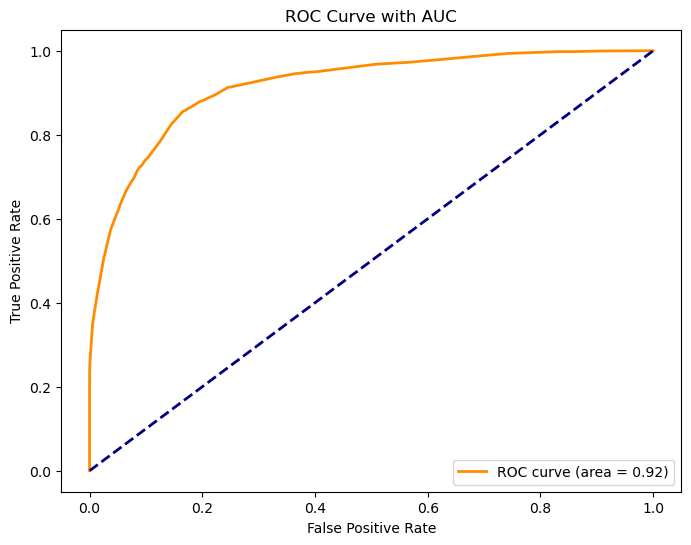

In [72]:
# Get predicted probabilities
y_probs = model_dt.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with AUC score
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC')
plt.legend(loc='lower right')
plt.show()

Decison Tree Imbalanced -

                        Metrics: Train Recall :   0.235 
                        Test Recall           :   0.225 
                        AUC                   :   0.92

## Fitting Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf_imbalanced = RandomForestClassifier(n_estimators=10, random_state=42).fit(X_train, y_train)

In [75]:
# creating the parameter grid using the one finalised in Decision Tree  modeland building up on that

params = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [80, 90, 100],
    'criterion': ['gini'],
    'n_estimators': [10, 15, 20]
}


grid_search_rf = GridSearchCV(estimator = rf_imbalanced,
                              param_grid=params,
                              cv=5,
                              n_jobs=-1,verbose=-1,
                              scoring='recall')

In [76]:
grid_search_rf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 7],
                         'min_samples_leaf': [80, 90, 100],
                         'n_estimators': [10, 15, 20]},
             scoring='recall', verbose=-1)

In [77]:
model_rf = grid_search_rf.best_estimator_
model_rf

RandomForestClassifier(max_depth=7, min_samples_leaf=90, n_estimators=10,
                       random_state=42)

In [78]:
evaluate_model_imbalanced(model_rf)

Train set performance
Recall: 0.0
Confusion Matrix:
[[966877      0]
 [  5629      0]]
____________________________________________________________
Test set performance
Recall: 0.0
Confusion Matrix:
[[322292      0]
 [  1877      0]]


In [79]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 90,
 'n_estimators': 10}

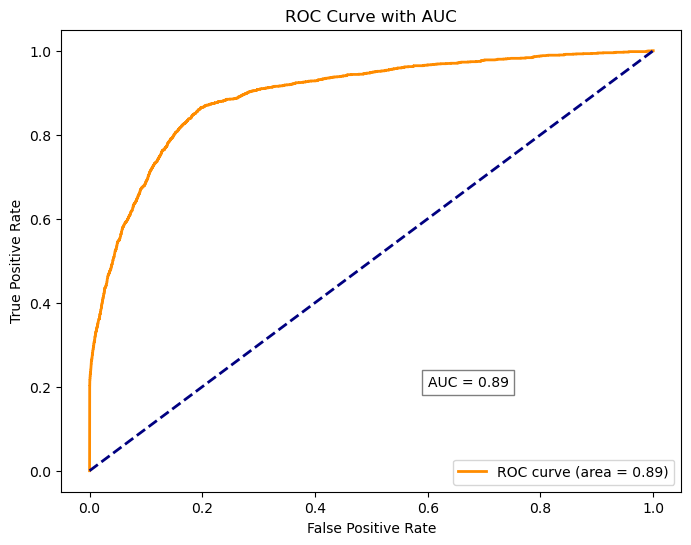

In [80]:
# Get predicted probabilities
y_probs = model_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with AUC score
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC')
plt.legend(loc='lower right')

# Show AUC score
plt.text(0.6, 0.2, 'AUC = {:.2f}'.format(roc_auc), bbox=dict(facecolor='white', alpha=0.5))

plt.show()


The recall is 0 but the AUC is high, it signifies that the model is confident in its negative predictions and is correctly identifying negative cases but is failing to capture positive cases.

### Random Forest - ADASYN

In [81]:
from imblearn.over_sampling import ADASYN
X_train_ada,y_train_ada = ADASYN().fit_resample(X_train,y_train)

In [82]:
rf_ada = DecisionTreeClassifier(random_state=42).fit(X_train_ada,y_train_ada)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [90, 100],
    'criterion': ['gini'],
    'n_estimators': [10, 15, 20]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search_rf_ada = GridSearchCV(
    estimator=rf_classifier,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=-1,
    scoring='recall'
)

In [84]:
grid_search_rf_ada.fit(X_train_ada,y_train_ada)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [90, 100],
                         'n_estimators': [10, 15, 20]},
             scoring='recall', verbose=-1)

In [85]:
grid_search_rf_ada.best_score_

0.8466982087843664

In [86]:
model_rf_ada = grid_search_rf_ada.best_estimator_
model_rf_ada

RandomForestClassifier(max_depth=11, min_samples_leaf=90, n_estimators=20,
                       random_state=42)

In [88]:
# Creating a Function for evaluating the model

def evaluate_model_ada(model):
  y_train_pred = model.predict(X_train_ada)
  y_test_pred = model.predict(X_test)

  print("Train set performance")
  print("Recall : ", recall_score(y_train_ada,y_train_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_train_ada,y_train_pred))
  print("-"*30)

  print("Test set performance")
  print("Recall : ", recall_score(y_test,y_test_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_test,y_test_pred))

In [89]:
evaluate_model_ada(model_rf_ada)

Train set performance
Recall :  0.8732299169777886
Confusion Matrix : 
[[678529 288348]
 [122476 843651]]
------------------------------
Test set performance
Recall :  0.7048481619605754
Confusion Matrix : 
[[225957  96335]
 [   554   1323]]


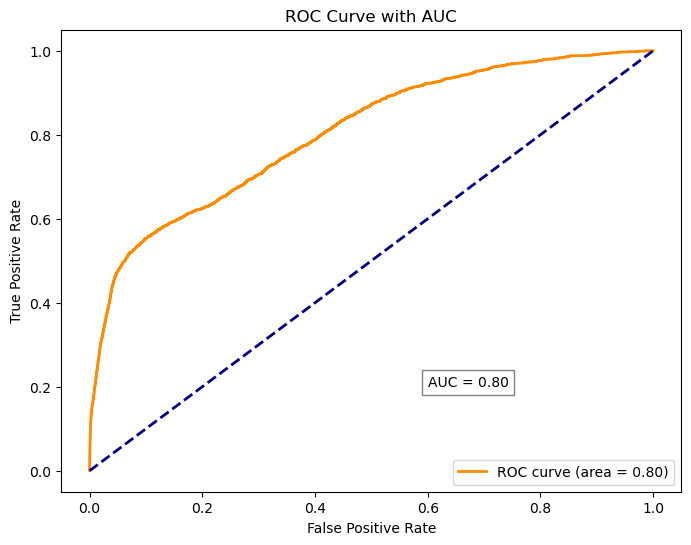

In [90]:
# Get predicted probabilities
y_probs = model_rf_ada.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with AUC score
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC')
plt.legend(loc='lower right')

# Show AUC score
plt.text(0.6, 0.2, 'AUC = {:.2f}'.format(roc_auc), bbox=dict(facecolor='white', alpha=0.5))

plt.show()


Random Forest- ADASYN have high Recall  as well as High AUC as compared to others.So we are moving forward with fraud Test dataset

In [91]:
df_test = pd.read_csv('fraudTest.csv')
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [92]:
print("Shape of test Data  : ", df_test.shape)

Shape of test Data  :  (555719, 23)


In [93]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [94]:
label_encoder = LabelEncoder()

df_test['merchant'] = label_encoder.fit_transform(df_test['merchant'])
df_test['category'] = label_encoder.fit_transform(df_test['category'])
df_test['gender'] = label_encoder.fit_transform(df_test['gender'])
df_test['street'] = label_encoder.fit_transform(df_test['street'])
df_test['city'] = label_encoder.fit_transform(df_test['city'])
df_test['state'] = label_encoder.fit_transform(df_test['state'])
df_test['job'] = label_encoder.fit_transform(df_test['job'])
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,341,157,39,29209,33.9659,-80.9355,333497,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,354,16,43,84002,40.3207,-110.4360,302,392,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,865,61,33,11710,40.6729,-73.5365,34496,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,320,764,8,32780,28.5697,-80.8191,54767,407,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,548,247,21,49632,44.2529,-85.0170,1126,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [95]:
# Converting date columns to datetime format
df_test['Trans_date'] = pd.to_datetime(df_test['trans_date_trans_time']).dt.date
df_test['Trans_date']=pd.to_datetime(df_test['Trans_date'])
df_test['Trans_time'] = pd.to_datetime(df_test['trans_date_trans_time']).dt.hour
df_test['dob']=pd.to_datetime(df_test['dob'])
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Trans_date,Trans_time
0,0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,341,157,39,29209,33.9659,-80.9355,333497,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12
1,1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,354,16,43,84002,40.3207,-110.4360,302,392,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12
2,2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,865,61,33,11710,40.6729,-73.5365,34496,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12
3,3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,320,764,8,32780,28.5697,-80.8191,54767,407,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12
4,4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,548,247,21,49632,44.2529,-85.0170,1126,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12


In [96]:
# Creating new Columns for Present Age,Days of the week and Month
df_test['Present_Age'] = round((df_test['Trans_date'] - df_test['dob'])/np.timedelta64(1, 'Y'))
df_test['Day_of_week'] = df_test.Trans_date.dt.dayofweek
df_test['Month'] = df_test['Trans_date'].dt.month
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Trans_date,Trans_time,Present_Age,Day_of_week,Month
0,0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,341,157,39,29209,33.9659,-80.9355,333497,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12,52.0,6,6
1,1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,354,16,43,84002,40.3207,-110.4360,302,392,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12,30.0,6,6
2,2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,865,61,33,11710,40.6729,-73.5365,34496,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12,50.0,6,6
3,3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,320,764,8,32780,28.5697,-80.8191,54767,407,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12,33.0,6,6
4,4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,548,247,21,49632,44.2529,-85.0170,1126,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12,65.0,6,6


In [97]:
import math

def dist(lat1, long1, lat2, long2):
    # Earth radius in kilometers
    R = 6373.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    long1_rad = math.radians(long1)
    lat2_rad = math.radians(lat2)
    long2_rad = math.radians(long2)

    # Calculate differences in latitude and longitude
    dlat = lat2_rad - lat1_rad
    dlong = long2_rad - long1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlong / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c  # Distance in kilometers

    return round(d, 4)


In [98]:
Dist = []

for p, q, r, s in zip(df_test['lat'], df_test['long'], df_test['merch_lat'], df_test['merch_long']):
    distance = dist(p, q, r, s)
    Dist.append(distance)


df_test['Distance']= Dist
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Trans_date,Trans_time,Present_Age,Day_of_week,Month,Distance
0,0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,341,157,39,29209,33.9659,-80.9355,333497,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12,52.0,6,6,24.5692
1,1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,354,16,43,84002,40.3207,-110.4360,302,392,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12,30.0,6,6,104.9580
2,2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,865,61,33,11710,40.6729,-73.5365,34496,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12,50.0,6,6,59.0986
3,3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,320,764,8,32780,28.5697,-80.8191,54767,407,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12,33.0,6,6,27.7073
4,4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,548,247,21,49632,44.2529,-85.0170,1126,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12,65.0,6,6,104.3679


In [99]:
df_test['Age_category'] = pd.cut(x=df_test['Present_Age'], bins=[0,10,20,30,40,50,60,70,80,90,100],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Trans_date,Trans_time,Present_Age,Day_of_week,Month,Distance,Age_category
0,0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,341,157,39,29209,33.9659,-80.9355,333497,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12,52.0,6,6,24.5692,50-60
1,1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,354,16,43,84002,40.3207,-110.4360,302,392,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12,30.0,6,6,104.9580,20-30
2,2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,865,61,33,11710,40.6729,-73.5365,34496,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12,50.0,6,6,59.0986,40-50
3,3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,320,764,8,32780,28.5697,-80.8191,54767,407,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12,33.0,6,6,27.7073,30-40
4,4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,548,247,21,49632,44.2529,-85.0170,1126,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12,65.0,6,6,104.3679,60-70


In [100]:
df_test['Age_category'] = label_encoder.fit_transform(df_test['Age_category'])

In [101]:
# Dropping unwanted columns
df_test1 = df_test.drop(['trans_date_trans_time','first','last','lat','long', 'Unnamed: 0','cc_num', 'zip', 'amt', 'trans_num', 'unix_time','merch_lat','merch_long'],axis=1)
df_test1.head()

,merchant,category,gender,street,city,state,city_pop,job,dob,is_fraud,Trans_date,Trans_time,Present_Age,Day_of_week,Month,Distance,Age_category
0,319,10,1,341,157,39,333497,275,1968-03-19,0,2020-06-21,12,52.0,6,6,24.5692,4
1,591,10,0,354,16,43,302,392,1990-01-17,0,2020-06-21,12,30.0,6,6,104.9580,1
2,611,5,0,865,61,33,34496,259,1970-10-21,0,2020-06-21,12,50.0,6,6,59.0986,3
3,222,9,1,320,764,8,54767,407,1987-07-25,0,2020-06-21,12,33.0,6,6,27.7073,2
4,292,13,1,548,247,21,1126,196,1955-07-06,0,2020-06-21,12,65.0,6,6,104.3679,5


In [102]:
classes = df_test1['is_fraud'].value_counts()
print("normal_trans = ",classes[0]/df_test1['is_fraud'].count()*100)
print("fraud_trans = ",classes [1]/df_test1['is_fraud'].count()*100)

normal_trans =  99.61401355721146
fraud_trans =  0.3859864427885316


In [103]:
df_test2 = df_test1[['gender', 'state', 'city_pop', 'Trans_time', 'Day_of_week', 'Month',
       'Age_category','is_fraud']]
df_test2.head()

,gender,state,city_pop,Trans_time,Day_of_week,Month,Age_category,is_fraud
0,1,39,333497,12,6,6,4,0
1,0,43,302,12,6,6,1,0
2,0,33,34496,12,6,6,3,0
3,1,8,54767,12,6,6,2,0
4,1,21,1126,12,6,6,5,0


In [104]:
X = df_test2.drop('is_fraud',axis=1)
y = df_test2['is_fraud']

In [105]:
X_train1,X_test1,y_train1,y_test1= train_test_split(X,y,stratify=y,random_state=42)

X_train1.shape,X_test1.shape

((416789, 7), (138930, 7))

### Random Forest ADASYN for test data

In [106]:
X_train_ada1,y_train_ada1 = ADASYN().fit_resample(X_train1,y_train1)

In [107]:
rf_ada1 = RandomForestClassifier(random_state=42).fit(X_train_ada1,y_train_ada1)

In [108]:
params = {
    'max_depth':[3,5,7,9,11],
    'min_samples_leaf':[90,100],
    'criterion':['gini'],
    'n_estimators' : [10,15,20]
}


grid_search_rf_ada1 = GridSearchCV(estimator = rf_ada1,
                              param_grid=params,
                              cv=5,
                              n_jobs=-1,verbose=-1,
                              scoring='recall')

In [109]:
grid_search_rf_ada1.fit(X_train_ada1,y_train_ada1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [90, 100],
                         'n_estimators': [10, 15, 20]},
             scoring='recall', verbose=-1)

In [110]:
model_rf_ada1 = grid_search_rf_ada1.best_estimator_
model_rf_ada1

RandomForestClassifier(max_depth=11, min_samples_leaf=100, n_estimators=10,
                       random_state=42)

In [111]:
y_pred_rf_ada1 = model_rf_ada1.predict(X)
print("Recall Score: ", recall_score(y,y_pred_rf_ada1))
print('__'*30)
print("Confusion Matrix:")
print(confusion_matrix(y,y_pred_rf_ada1))

Recall Score:  0.8932400932400932
____________________________________________________________
Confusion Matrix:
[[477443  76131]
 [   229   1916]]


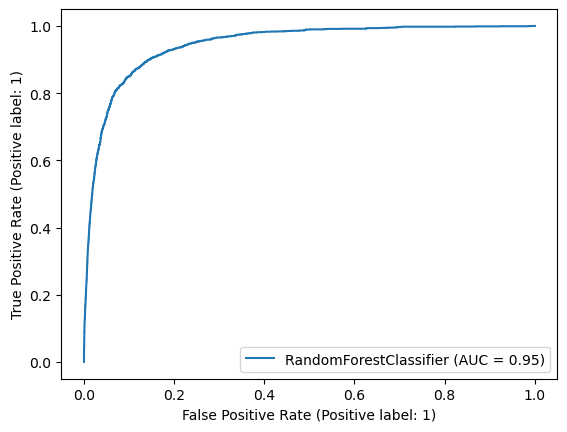

In [112]:
from sklearn.metrics import plot_roc_curve

# Assuming model_rf_ada1 is your trained model and X, y are your data
plot_roc_curve(model_rf_ada1, X, y)
plt.show()

Random forest ADASYN -

                    Metrics : 
                                
                                Recall :0.89
                                
                                AUC    :0.95

**The Random Forest model, trained on the ADASYN-synthesized data, showcases strong performance in addressing imbalanced datasets. The high Recall and AUC scores suggest that the model is proficient in identifying positive instances while maintaining good overall predictive capability.**

In [113]:
# Creating a dataframe to compare actual and predicted values
y_pred_final = pd.Series(y_pred_rf_ada1)

df_pred_output = pd.concat([X,y,y_pred_final],axis=1)

df_pred_output.rename(columns={0:'y_pred'},inplace= True)

df_pred_output.head()

,gender,state,city_pop,Trans_time,Day_of_week,Month,Age_category,is_fraud,y_pred
0,1,39,333497,12,6,6,4,0,0
1,0,43,302,12,6,6,1,0,0
2,0,33,34496,12,6,6,3,0,0
3,1,8,54767,12,6,6,2,0,0
4,1,21,1126,12,6,6,5,0,0


In [114]:
# Fraudulent transactions
fraud = df_pred_output[df_pred_output['is_fraud']==1]

fraud.head()

,gender,state,city_pop,Trans_time,Day_of_week,Month,Age_category,is_fraud,y_pred
1685,0,42,23,22,6,6,4,1,1
1767,1,47,1306,22,6,6,5,1,0
1781,1,47,1306,22,6,6,5,1,0
1784,1,17,71335,22,6,6,1,1,1
1857,0,42,23,23,6,6,4,1,1


.

.

##                          Cost Benefit Analysis:

In [115]:
# Merging train and test dataset for cost benefit analysis

df_merge_final = pd.concat([df_train, df_test],axis=0)
df_merge_final.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Trans_date,Trans_time,Present_Age,Day_of_week,Month,Distance,Age_category
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,0,31.0,1,1,78.6222,30-40
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,0,41.0,1,1,30.2217,40-50
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,0,57.0,1,1,108.2401,50-60
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,0,52.0,1,1,95.7033,50-60
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,0,33.0,1,1,77.5811,30-40


## Part I: Analyse the dataset and find the following figures:

.

**Ques 1 :-  Average number of transactions per month**

In [116]:
a = df_merge_final.trans_num.count()/24
print("Average Number of Transactions per month are :",a)

Average Number of Transactions per month are : 77183.08333333333


**Ques 2 :-  Average number of fraudulent transaction per month.**

In [117]:
b= df_merge_final[df_merge_final['is_fraud']==1].trans_num.count()/24
print("Average Number of Fraudulent Transactions per month are :",b)

Average Number of Fraudulent Transactions per month are : 402.125


**Ques 3 :-  Average amount per fraud transaction.**

In [118]:
c= df_merge_final[df_merge_final['is_fraud']==1].amt.mean()
print("Average Amount Per Fraudulent Transactions is : ",c)

Average Amount Per Fraudulent Transactions is :  530.6614122888789


.

.

## Part II: Compare the cost incurred per month by the bank before and after the model deployment:

.

**Ques 1 :- Cost incurred per month before the model was deployed (b*c)**



In [119]:
Cost_incurred_before = b*c
print("Cost incurred per month before the model is built and deployed= $",Cost_incurred_before)

Cost incurred per month before the model is built and deployed= $ 213392.22041666543


**Ques2 :- Average number of transactions per month detected as fraudulent by the model (TF)**


In [120]:
TF = fraud.y_pred.sum()//14
print("Average number of transactions per month detected as fraudulent by the model (TF)",TF)

Average number of transactions per month detected as fraudulent by the model (TF) 136


**Ques 3 :-Cost of providing customer executive support per fraudulent transaction detected by the model**



In [121]:
1.5

1.5

**Ques4 :- Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)**



In [122]:
print("Total cost of providing customer support per month for fraudulent transactions detected by the model =$",TF*1.5)

Total cost of providing customer support per month for fraudulent transactions detected by the model =$ 204.0


**Ques5 :- Average number of transactions per month that are fraudulent but not detected by the model (FN)**



In [123]:
FN  = fraud[fraud['y_pred']==0].is_fraud.sum()//14
print("Average number of transactions per month that are fraudulent but not detected by the model (FN)=",FN)

Average number of transactions per month that are fraudulent but not detected by the model (FN)= 16


**Ques6 : - Cost incurred due to fraudulent transactions left undetected by the model (FN*c)**



In [124]:
print("Cost incurred due to these fraudulent transactions left undetected by the model =$",FN*c)

Cost incurred due to these fraudulent transactions left undetected by the model =$ 8490.582596622062


**Ques 7 :- Cost incurred per month after the model is built and deployed (4+6)**

In [125]:
Cost_incurred_after = (TF*1.5)+(FN*c)
print("Cost incurred per month after the model is built and deployed (4+6)",Cost_incurred_after)

Cost incurred per month after the model is built and deployed (4+6) 8694.582596622062


**Ques8 :- Final savings = Cost incurred before - Cost incurred after(1-7)**

In [126]:
Final_Savings = int(Cost_incurred_before-Cost_incurred_after)

print("Final Savings After Deploying the model = $",Final_Savings)

Final Savings After Deploying the model = $ 204697
